In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline

In [116]:
test = pd.read_csv("C:/Users/alvar/Desktop/IPP/Introducción al Machine Learning/M3/test.csv")
train = pd.read_csv("C:/Users/alvar/Desktop/IPP/Introducción al Machine Learning/M3/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# a) Debemos describir brevemente la cantidad de valores faltantes para cada una de las variables de la base de datos.

In [117]:
print('La cantidad de datos para la variable test es', test.shape)
print('La cantidad de datos para la variable train es', train.shape)

La cantidad de datos para la variable test es (418, 11)
La cantidad de datos para la variable train es (891, 12)


In [118]:
# Cabin presenta un 77% de nulos, por lo que mantenerla no aportará mucho más adelante.

print("Porcentaje de nulos en train")
(train.isna().sum()/len(train)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

Porcentaje de nulos en train


PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            19.86%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [119]:
# Cabin presenta un 78% de nulos, por lo que mantenerla no aportará mucho más adelante.

print("Porcentaje de nulos en test")
(test.isna().sum()/len(test)*100).apply(lambda x: str(((x*100)//1)/100)+"%")

Porcentaje de nulos en test


PassengerId      0.0%
Pclass           0.0%
Name             0.0%
Sex              0.0%
Age            20.57%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare            0.23%
Cabin          78.22%
Embarked         0.0%
dtype: object

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

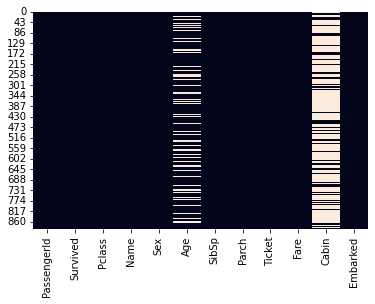

In [120]:
# Se contabilizan y visualizan los nulos.

display(train.isna().sum())
sns.heatmap(train.isnull(), cbar=False)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

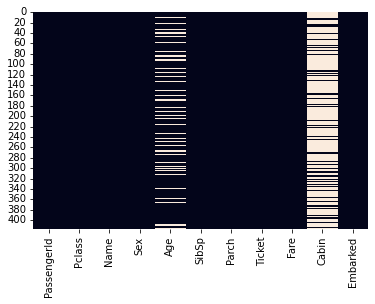

In [121]:
# Se contabilizan y visualizan los nulos.

display(test.isna().sum())
sns.heatmap(test.isnull(), cbar=False)

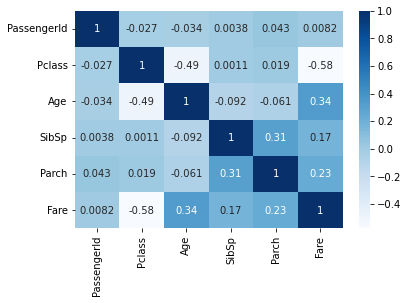

In [122]:
# Se busca alguna correlación. No se detecta.

sns.heatmap(test.corr(), annot=True, cmap = 'Blues')
plt.show()

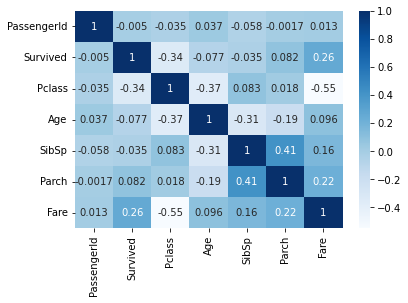

In [123]:
# Se busca alguna correlación. No se detecta.

sns.heatmap(train.corr(), annot=True, cmap = 'Blues')
plt.show()

          PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Survived                                                                    
0                 549     549   549  549  424    549    549     549   549   
1                 342     342   342  342  290    342    342     342   342   

          Cabin  Embarked  
Survived                   
0            68       549  
1           136       340  


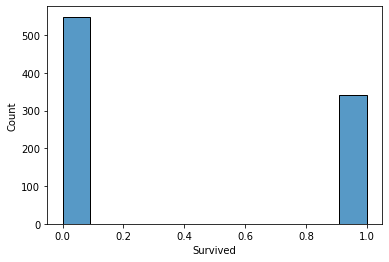

In [124]:
# Se revisa que no haya sobreajuste.

print(train.groupby(["Survived"]).count())

sns.histplot(x = "Survived", data = train);

In [125]:
# La proporción de personas que murieron.

549/891

0.6161616161616161

# b) Completemos aquellas variables que se encuentran faltantes para las bases de train (“Age”,”fare”, “Cabin”) y test ( “Age”, “Cabin”, “embarked”).

In [126]:
# Se busca la moda de Embarked para luego imputar

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [127]:
# Se imputan los valores de Age con la edad promedio.
mean_train = train['Age'].mean()
train['Age'] = train['Age'].fillna(mean_train)

# Se imputan los valores de Embarked con "S" que es la moda.
train['Embarked'] = train['Embarked'].fillna("S")

# Se elimina Cabin ya que contiene un 77% de datos nulos.
del(train['Cabin'])

In [128]:
# Se imputan los valores de Age con la edad promedio.
mean_test = test['Age'].mean()
test['Age'] = test['Age'].fillna(mean_test)

# Se imputan los valores de Fare con la tarifa promedio.
mean_test_fare = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(mean_test_fare)

# Se elimina Cabin ya que contiene un 77% de datos nulos.
del(test['Cabin'])

In [129]:
# Se separa el género de los pasajeros.

pd.get_dummies(train,columns = ["Sex"])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,0,1


In [130]:
# Se conserva una variable de género.

pd.get_dummies(train,columns = ["Sex"], drop_first = True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C,1


In [131]:
train.drop(["PassengerId", "Name", "Ticket", 'Embarked'], axis = 1, inplace = True)

In [132]:
train = pd.get_dummies(train, columns = ["Sex"], drop_first = True)

In [133]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# c) Ahora, debemos ajustar nuestro primer modelo de árbol de decisión.

In [134]:
train.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male'], dtype='object')

In [135]:
# Se definen las variables v_exp y v_obj

feature_cols=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male']
v_exp = train[feature_cols]
v_obj = train.Survived

In [136]:
# Se divive la base train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(v_exp,v_obj, test_size= 0.25, random_state= 0 )

In [137]:
# Se realiza el entrenamiento del modelo

from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_depth=3, random_state=0)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Profundidad del árbol:3
Número de nodos terminales:8


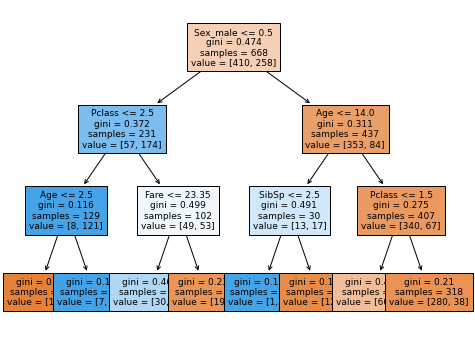

In [138]:
# Visualizamos gráficamente el árbol de decisión
from sklearn.tree import plot_tree

print(f"Profundidad del árbol:{modelo.get_depth()}")
print(f'Número de nodos terminales:{modelo.get_n_leaves()}')
plt.figure(figsize=(8,6))

plot_tree(decision_tree= modelo, feature_names=v_exp.columns, filled=True, max_depth=3, fontsize=9);

# d) Finalmente, podemos entrenar y determinar Accuracy, F1-Score, Recall.

In [139]:
y_pred= modelo.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1], dtype=int64)

In [140]:
# Se crea matriz de confusión.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[120,  19],
       [ 22,  62]], dtype=int64)

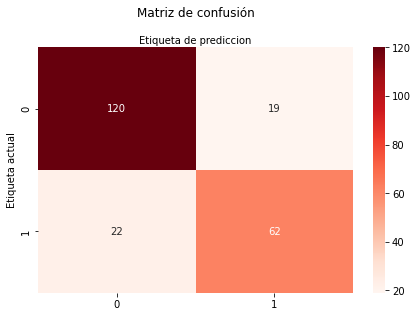

In [141]:
# Se expresa visualmente.

nombre_clase = [0.1]
fig, ax = plt.subplots()
marcas= np.arange(len(nombre_clase))
plt.xticks(marcas, nombre_clase)
plt.yticks(marcas, nombre_clase)

sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, fmt = 'g',cmap = 'Reds' )
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion');

In [142]:
X_test.shape

(223, 6)

In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [144]:
# Se obtiene la Accuracy, Precision, Recall y F1 del modelo.

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1:", f1)

Accuracy: 0.8161434977578476
Precision: 0.7654320987654321
Recall 0.7380952380952381
F1: 0.7515151515151515


In [145]:
# Reporte de clasificación.

from sklearn import metrics as mt

print(mt.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       139
           1       0.77      0.74      0.75        84

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



In [146]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [147]:
# Se prepara la base test para predecir resultados con el modelo.

ids = test['PassengerId']
test = test.drop(['PassengerId', 'Name','Ticket','Embarked'],  axis = 1)

pd.get_dummies(test,columns = ["Sex"])
pd.get_dummies(test,columns = ["Sex"], drop_first = True)
test = pd.get_dummies(test, columns = ["Sex"], drop_first = True)

In [148]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0


In [149]:
# Se utiliza el modelo de árbol de decisión para predecir los resultados.

prediccion_test = modelo.predict(test)
out_regresion = pd.DataFrame({'PassengerId': ids, 'Survived': prediccion_test})
print('Predicción Regresión Logística:')
print(out_regresion)

Predicción Regresión Logística:
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [150]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.50000,0,0,7.8292,1
1,3,47.00000,1,0,7.0000,0
2,2,62.00000,0,0,9.6875,1
3,3,27.00000,0,0,8.6625,1
4,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,1
414,1,39.00000,0,0,108.9000,0
415,3,38.50000,0,0,7.2500,1
416,3,30.27259,0,0,8.0500,1


In [151]:
# Los resultados son:

viven = out_regresion['Survived'].sum()
print(viven, 'personas sobrevivirían de las 418')

158 personas sobrevivirían de las 418
